In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teams_to_systems = json.load(open('team-to-submissions.json'))
datasets = {
    # dataset_name: (category, prefix, suffix)
    'pan24-generative-authorship-test-20240502-test': ('main', '', ''),
    'pan24-generative-authorship-test-b-20240506-test': ('cross-domain', '', '-cross-domain'),
    'pan24-generative-authorship-news-test-c-20240506-test': ('unicode-full', '', '-unicode-full'),
    'pan24-generative-authorship-news-test-d-20240506-test': ('unicode-half', '', '-unicode-half'),
    'pan24-generative-authorship-news-test-e-20240506-test': ('german', '', '-german'),
    'pan24-generative-authorship-news-test-f-20240514-test': ('paraphrase', '', '-paraphrase'),
    'pan24-generative-authorship-news-test-g-20240516-test': ('contrastive', '', ''),              # suffix already part of the name
    'pan24-generative-authorship-news-test-h-20240521-test': ('short', '', '-short'),
    'pan24-generative-authorship-eloquent-20240523-test': ('eloquent', 'eloquent-', ''),
}

df = []
evaluation_scores = json.load(open('evaluation-scores.json', 'r'))
for team, systems in teams_to_systems.items():
    for s in systems:
        t = team if team != 'baseline' else s
        row_base = {'system': ':'.join((team, s)) if team != 'baseline' else t, 'team': t}
        for d, (dname, pre, suff) in datasets.items():
            df.extend(
                {
                    **row_base,
                    'dataset': ''.join((pre, src, suff)),
                    'category': dname,
                    **evaluation_scores[team][s][d]['_sources'][src]
                } for src in evaluation_scores[team].get(s, {}).get(d, {}).get('_sources', [])
                    if not (src.endswith('german') and dname == 'main')   # German was mixed into main dataset
            )

df = pd.DataFrame(df)
df.set_index(['team', 'system', 'dataset', 'category'], inplace=True)
df

roc-auc  \
team         system                       dataset                     category            
cnlp-nits-pp cnlp-nits-pp:direct-velocity alpaca-7b                   main        0.996   
                                          bigscience-bloomz-7b1       main        0.988   
                                          gemini-pro                  main        0.998   
                                          gemini-pro-high-temperature main        0.999   
                                          gpt-3.5-turbo-0125          main        0.999   
...                                                                                 ...   
logistic-fsu logistic-fsu                 eloquent-chatgpt35          eloquent    0.993   
                                          eloquent-gptsw3             eloquent    0.879   
                                          eloquent-reindeer-mistral   eloquent    1.000   
                                          eloquent-reindeer-poro      eloquent    1.000   
                                          eloquent-verbanex-ai        eloquent    1.000   

                                                                                brier  \
team         system                       dataset                     category          
cnlp-nits-pp cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.866   
                                          bigscience-bloomz-7b1       main      0.865   
                                          gemini-pro                  main      0.881   
                                          gemini-pro-high-temperature main      0.883   
                                          gpt-3.5-turbo-0125          main      0.878   
...                                                                               ...   
logistic-fsu logistic-fsu                 eloquent-chatgpt35          eloquent  0.885   
                                          eloquent-gptsw3             eloquent  0.821   
                                          eloquent-reindeer-mistral   eloquent  0.862   
                                          eloquent-reindeer-poro      eloquent  0.881   
                                          eloquent-verbanex-ai        eloquent  0.879   

                                                                                  c@1  \
team         system                       dataset                     category          
cnlp-nits-pp cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.986   
                                          bigscience-bloomz-7b1       main      0.980   
                                          gemini-pro                  main      0.996   
                                          gemini-pro-high-temperature main      0.997   
                                          gpt-3.5-turbo-0125          main      0.997   
...                                                                               ...   
logistic-fsu logistic-fsu                 eloquent-chatgpt35          eloquent  0.958   
                                          eloquent-gptsw3             eloquent  0.875   
                                          eloquent-reindeer-mistral   eloquent  0.958   
                                          eloquent-reindeer-poro      eloquent  1.000   
                                          eloquent-verbanex-ai        eloquent  1.000   

                                                                                   f1  \
team         system                       dataset                     category          
cnlp-nits-pp cnlp-nits-pp:direct-velocity alpaca-7b                   main      0.954   
                                          bigscience-bloomz-7b1       main      0.934   
                                          gemini-pro                  main      0.963   
                                          gemini-pro-high-temperature main      0.976   
                                          gpt-

### System Mean Performance Per Dataset

In [3]:
df_team_ds_mean = df.groupby(['dataset', 'category', 'system']).mean().sort_values(['dataset', 'mean'], ascending=False)
df_team_ds_mean

roc-auc  \
dataset                              category system                                                    
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                                1.000   
                                              cnlp-nits-pp:direct-velocity                      1.000   
                                              you-shun-you-de:charitable-mole_v3                0.926   
                                              you-shun-you-de:plain-fortress                    0.926   
                                              g-fosunlpteam:gritty-producer                     0.941   
...                                                                                               ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                      0.252   
                                              lm-detector:detector                              0.324   
                                              lam:several-fleet                                 0.501   
                                              foshan-university-of-guangdong:independent-net    0.500   
                                              turtlewu:0.962_smoke_transformer_new              0.248   

                                                                                              brier  \
dataset                              category system                                                  
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                              0.943   
                                              cnlp-nits-pp:direct-velocity                    0.871   
                                              you-shun-you-de:charitable-mole_v3              0.930   
                                              you-shun-you-de:plain-fortress                  0.930   
                                              g-fosunlpteam:gritty-producer                   0.822   
...                                                                                             ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                    0.514   
                                              lm-detector:detector                            0.476   
                                              lam:several-fleet                               0.747   
                                              foshan-university-of-guangdong:independent-net  0.750   
                                              turtlewu:0.962_smoke_transformer_new            0.299   

                                                                                                c@1  \
dataset                              category system                                                  
vicgalle-gpt2-open-instruct-v1-short short    marsan:staff-trunk                              0.960   
                                              cnlp-nits-pp:direct-velocity                    0.974   
                                              you-shun-you-de:charitable-mole_v3              0.941   
                                              you-shun-you-de:plain-fortress                  0.941   
                                              g-fosunlpteam:gritty-producer                   0.957   
...                                                                                             ...   
alpaca-7b                            main     turtlewu:0.853_smoke_cnn_new                    0.305   
                                              lm-detector:detector                            0.241   
                                              lam:several-fleet                               0.011   
                                              foshan-university-of-guangdong:independent-net  0.000   
                                              turtlewu:0.962_smoke_transformer_new            0.235   

                                                

### System Performance Spread

In [4]:
df_team_std = df_team_ds_mean.groupby('system').std().sort_values('mean')
df_team_std

,roc-auc,brier,c@1,f1,f05u,mean
system,,,,,,
foshan-university-of-guangdong:independent-net,0.007455,0.002191,0.011524,0.022649,0.025107,0.013128
lam:several-fleet,0.030262,0.034410,0.062270,0.059880,0.064090,0.033302
gra:ash-causeway,0.000000,0.000000,0.057666,0.053457,0.057624,0.033782
turtlewu:no_change_test,0.059021,0.041255,0.052396,0.104717,0.075011,0.047966
no-999:method1,0.065524,0.010896,0.051835,0.127166,0.090476,0.056358
...,...,...,...,...,...,...
j1j:soft-electrolysis,0.362793,0.240594,0.341828,0.343863,0.346499,0.326113
j1j:tangy-frequency,0.363623,0.242834,0.341512,0.344275,0.346049,0.326794
karami-kheiri:bare-broker,0.243608,0.093462,0.448723,0.429562,0.432570,0.328587


### System Mean Performance

In [5]:
df_team_mean = df.groupby(['team', 'system']).mean().sort_values('mean', ascending=False)
df_team_mean

roc-auc  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.960044   
                               you-shun-you-de:charitable-mole_v3                  0.960044   
marsan                         marsan:staff-trunk                                  0.978604   
g-fosunlpteam                  g-fosunlpteam:gritty-producer                       0.952985   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.942286   
...                                                                                     ...   
turtlewu                       turtlewu:cnn_fanle                                  0.351824   
foshan-university-of-guangdong foshan-university-of-guangdong:pizzicato-radian     0.482544   
turtlewu                       turtlewu:transform_fanle                            0.288088   
lam                            lam:several-fleet                                   0.493306   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net      0.502721   

                                                                                      brier  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.955574   
                               you-shun-you-de:charitable-mole_v3                  0.955574   
marsan                         marsan:staff-trunk                                  0.946415   
g-fosunlpteam                  g-fosunlpteam:gritty-producer                       0.917103   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.938837   
...                                                                                     ...   
turtlewu                       turtlewu:cnn_fanle                                  0.575103   
foshan-university-of-guangdong foshan-university-of-guangdong:pizzicato-radian     0.723647   
turtlewu                       turtlewu:transform_fanle                            0.386824   
lam                            lam:several-fleet                                   0.733714   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net      0.750353   

                                                                                        c@1  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.957794   
                               you-shun-you-de:charitable-mole_v3                  0.957794   
marsan                         marsan:staff-trunk                                  0.940736   
g-fosunlpteam                  g-fosunlpteam:gritty-producer                       0.947221   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.939306   
...                                                                                     ...   
turtlewu                       turtlewu:cnn_fanle                                  0.373000   
foshan-university-of-guangdong foshan-university-of-guangdong:pizzicato-radian     0.225059   
turtlewu                       turtlewu:transform_fanle                            0.367397   
lam                            lam:several-fleet                                   0.037735   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net      0.006279   

                                                                                         f1  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.942338   
                               you-shun-you-de:charitable-mole_v3                  0.942338

### System Mean Performance (Stability-adjusted)

In [6]:
df_team_mean_adjusted = df_team_mean - df_team_std
df_team_mean_adjusted = df_team_mean_adjusted.sort_values('mean', ascending=False)
df_team_mean_adjusted

roc-auc  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.898382   
                               you-shun-you-de:charitable-mole_v3                  0.898382   
marsan                         marsan:staff-trunk                                  0.927461   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.861229   
                               iimasnlp:final-run6-gnnllm_llmft_stylofeat-full...  0.860369   
...                                                                                     ...   
turtlewu                       turtlewu:change_test                                0.153930   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net      0.495266   
lam                            lam:several-fleet                                   0.463045   
turtlewu                       turtlewu:cnn_fanle                                  0.097480   
                               turtlewu:transform_fanle                           -0.023509   

                                                                                      brier  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.892737   
                               you-shun-you-de:charitable-mole_v3                  0.892737   
marsan                         marsan:staff-trunk                                  0.880554   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.862104   
                               iimasnlp:final-run6-gnnllm_llmft_stylofeat-full...  0.860467   
...                                                                                     ...   
turtlewu                       turtlewu:change_test                                0.473386   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net      0.748162   
lam                            lam:several-fleet                                   0.699304   
turtlewu                       turtlewu:cnn_fanle                                  0.422785   
                               turtlewu:transform_fanle                            0.109912   

                                                                                        c@1  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.894600   
                               you-shun-you-de:charitable-mole_v3                  0.894600   
marsan                         marsan:staff-trunk                                  0.847693   
iimasnlp                       iimasnlp:final-run7-gnnllm_llmft_stylofeat-full...  0.858962   
                               iimasnlp:final-run6-gnnllm_llmft_stylofeat-full...  0.860600   
...                                                                                     ...   
turtlewu                       turtlewu:change_test                                0.207819   
foshan-university-of-guangdong foshan-university-of-guangdong:independent-net     -0.005245   
lam                            lam:several-fleet                                  -0.024535   
turtlewu                       turtlewu:cnn_fanle                                  0.122817   
                               turtlewu:transform_fanle                            0.082303   

                                                                                         f1  \
team                           system                                                         
you-shun-you-de                you-shun-you-de:plain-fortress                      0.863780   
                               you-shun-you-de:charitable-mole_v3                  0.863780

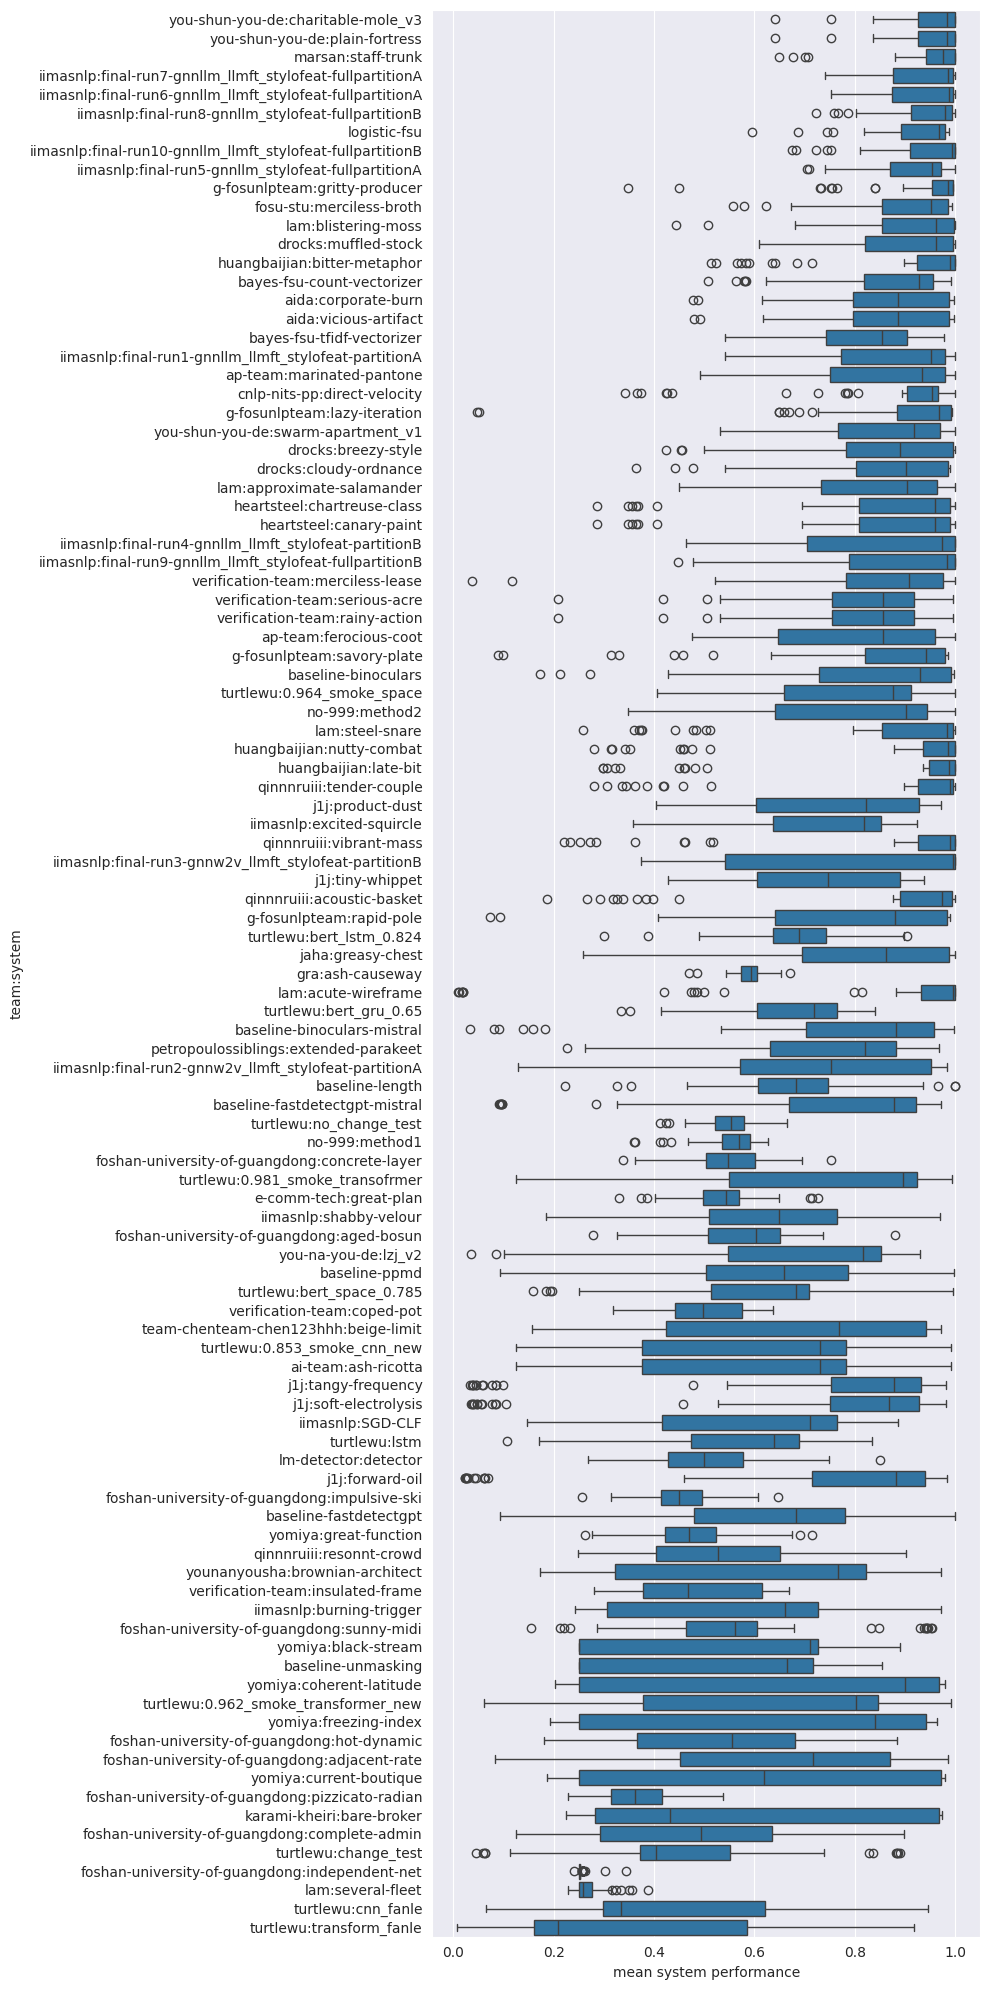

In [7]:
plt.figure(figsize=(10, 20))
sort_order = df_team_mean_adjusted['mean'].groupby('system').mean().sort_values(ascending=False).index
sns.boxplot(data=df, y='system', x='mean', order=sort_order).set(xlabel='mean system performance', ylabel='team:system')
plt.tight_layout()
plt.savefig('../data/eval-figures/system-performance.pdf')
plt.show()

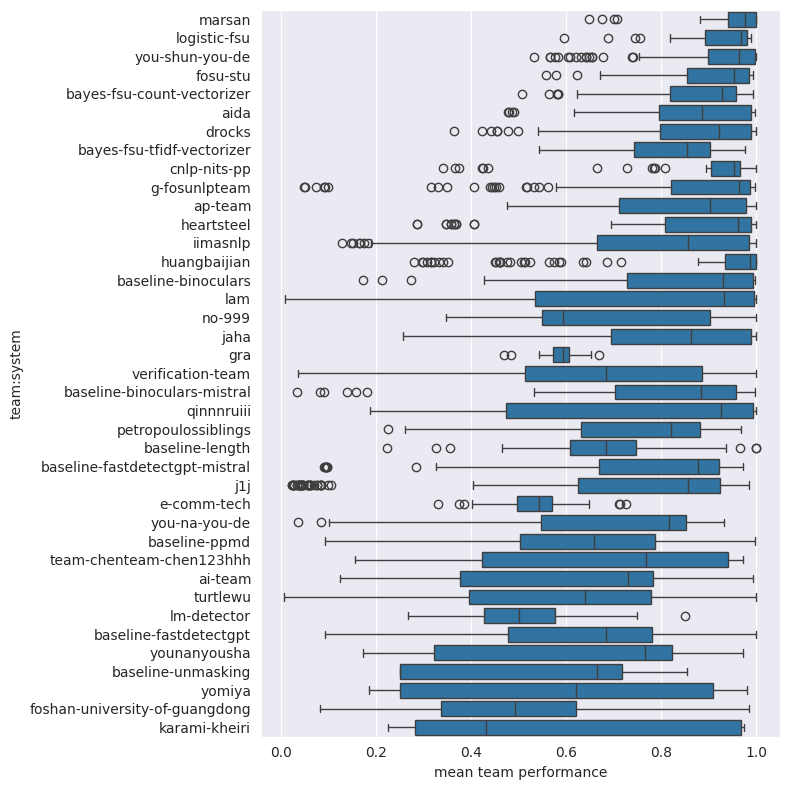

In [14]:
plt.figure(figsize=(8, 8))
sort_order = df_team_mean_adjusted['mean'].groupby('team').mean().sort_values(ascending=False).index
sns.boxplot(data=df, y='team', x='mean', order=sort_order).set(xlabel='mean team performance', ylabel='team:system')
plt.tight_layout()
plt.savefig('../data/eval-figures/team-performance.pdf')
plt.show()

### Dataset Performance

In [9]:
df_ds_mean = (1 - df).groupby('dataset').mean().sort_values('mean', ascending=False)
df_ds_mean.to_csv('../data/eval-figures/eloquent-scores.csv')
df_ds_mean

,roc-auc,brier,c@1,f1,f05u,mean
dataset,,,,,,
gpt-4-turbo-preview-german-short,0.508384,0.386326,0.573221,0.614395,0.592291,0.534895
text-bison-002-german-short,0.509047,0.376884,0.574558,0.604767,0.599477,0.532965
gemini-pro-high-temperature-unicode-half,0.435854,0.347990,0.478350,0.510350,0.524485,0.459379
vicgalle-gpt2-open-instruct-v1-short,0.365430,0.280640,0.428047,0.560837,0.582977,0.443593
alpaca-7b-short,0.354837,0.279070,0.437814,0.553756,0.589930,0.443081
...,...,...,...,...,...,...
meta-llama-llama-2-70b-chat-hf-cross-domain,0.149554,0.124465,0.185059,0.192614,0.186337,0.167624
text-bison-002,0.151078,0.123311,0.183417,0.194728,0.180961,0.166738
qwen-qwen1.5-72b-chat-8bit,0.147990,0.120845,0.180913,0.193835,0.183893,0.165466


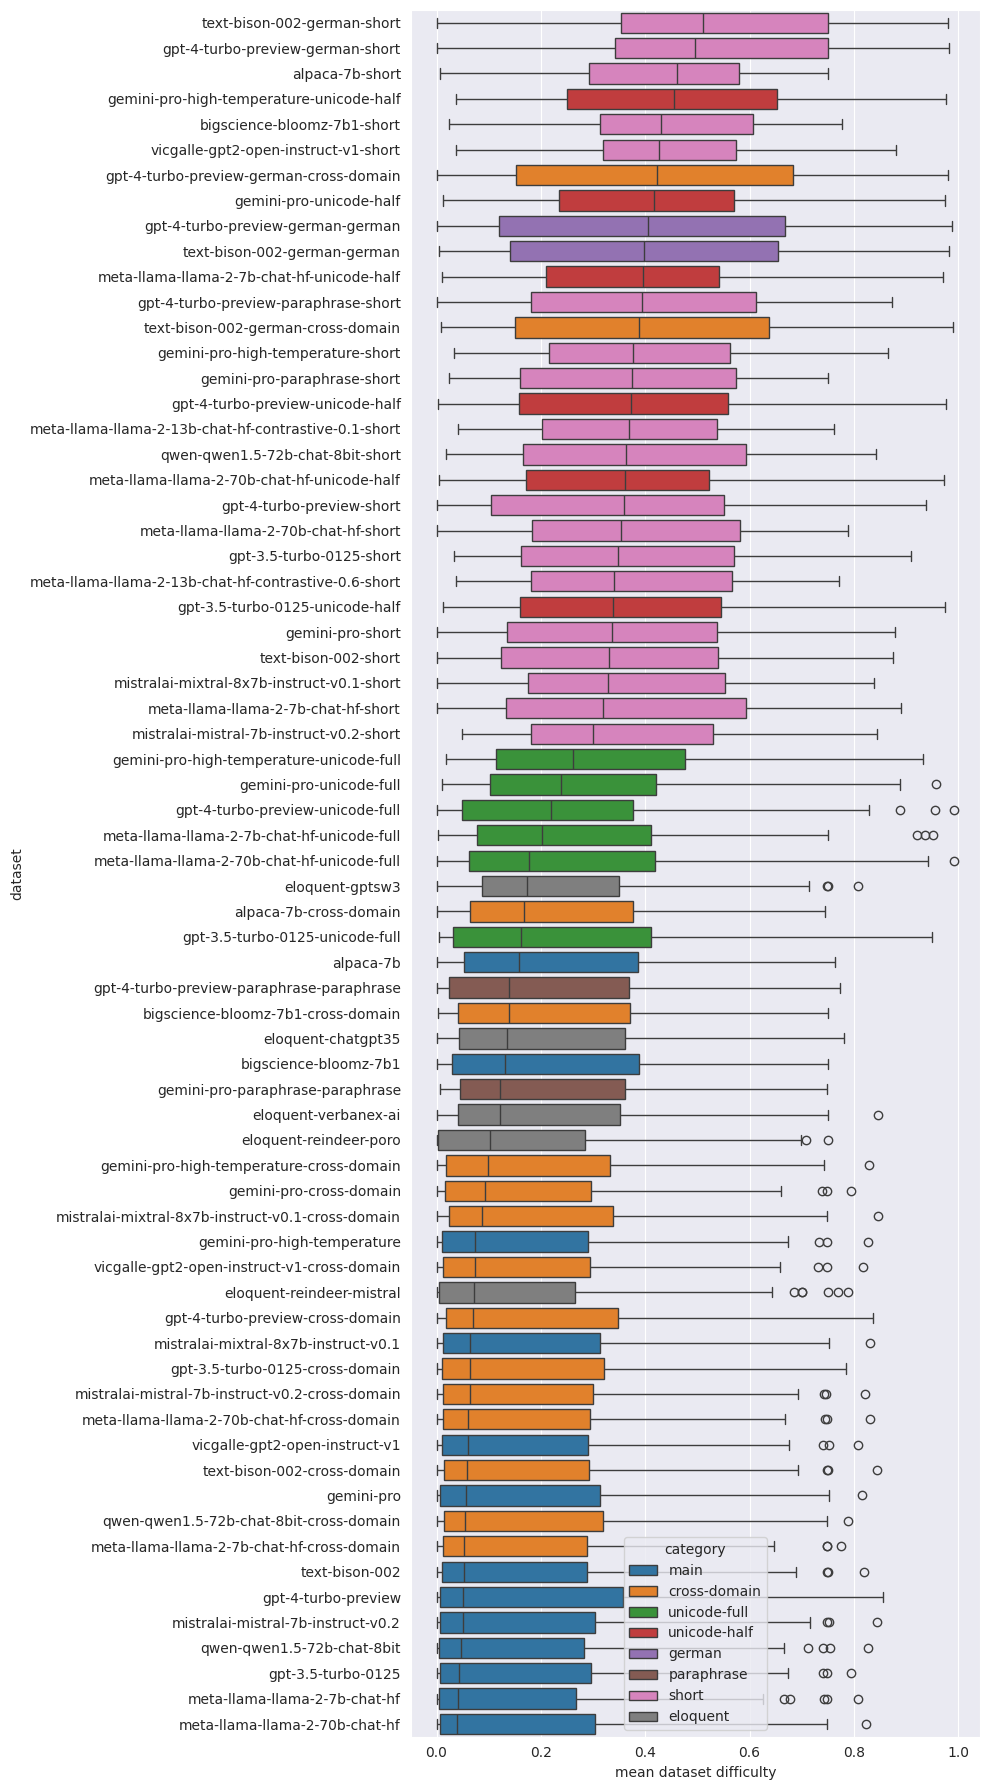

In [10]:
sort_order = df.groupby('dataset').median().sort_values('mean').index
plt.figure(figsize=(10, 18))
sns.boxplot(data=(1 - df), y='dataset', x='mean', hue='category', order=sort_order).set(xlabel='mean dataset difficulty')
plt.tight_layout()
plt.savefig('../data/eval-figures/dataset-performance.pdf')
plt.show()

### ELOQUENT Breaker Performance

In [11]:
df_eloquent_ds = 1 - df.loc[:, :, :, 'eloquent']
df_eloquent_mean = df_eloquent_ds.groupby('dataset').mean().sort_values('mean', ascending=False)
df_eloquent_mean.to_csv('../data/eval-figures/eloquent-scores.csv')
df_eloquent_mean

,roc-auc,brier,c@1,f1,f05u,mean
dataset,,,,,,
eloquent-gptsw3,0.212971,0.190971,0.257728,0.264748,0.248330,0.234971
eloquent-chatgpt35,0.187689,0.161883,0.229757,0.262913,0.265709,0.221592
eloquent-verbanex-ai,0.175680,0.155029,0.211136,0.254495,0.258534,0.210971
eloquent-reindeer-poro,0.153194,0.140825,0.189175,0.207505,0.198078,0.177777
eloquent-reindeer-mistral,0.149699,0.139320,0.188175,0.203466,0.194117,0.174981


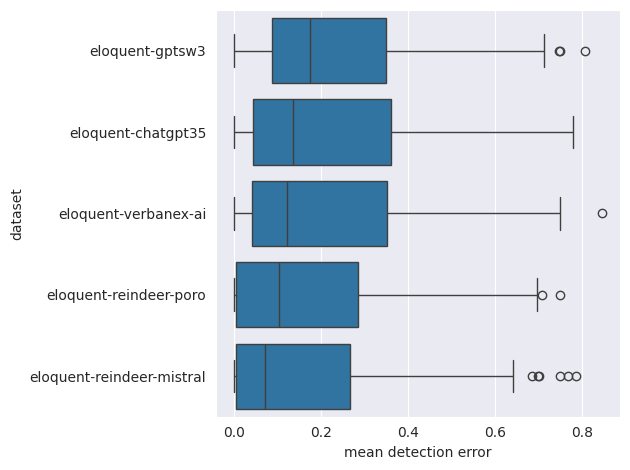

In [12]:
plt.figure()
sns.boxplot(data=df_eloquent_ds, y='dataset', x='mean', order=df_eloquent_mean.index).set(xlabel='mean detection error')
plt.tight_layout()
plt.savefig('../data/eval-figures/eloquent-scores.pdf')
plt.show()